In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as ax3d
import seaborn as sns; sns.set()
import numpy as np

In [124]:
from sklearn.datasets.samples_generator import make_blobs
X ,y_true = make_blobs(n_samples=100, n_features=3, centers=4, cluster_std=[0.6, 1.8, 0.3, 5], random_state=9)
X=X[:, ::-1]

In [81]:
X[:,0]

array([ -4.635783  ,  -3.78897681,   1.71319015,   9.17928218,
         9.23722667,   1.85484727,  -9.79371928,   9.523188  ,
       -10.81964464,   9.4252615 , -10.14736347,   7.88849378,
         8.19413509,  -5.31997732,   9.53302146,   7.90958818,
       -10.08612596,  -9.90880018,   2.14633522,   1.30194348,
         9.90183996,   7.62225804,   8.47868727,   1.79191081,
         1.97647976,   2.05948418,  -4.93781145, -10.25345174,
         2.89932144,  -9.51965546,   1.93313412,   2.26737597,
         8.2341711 ,   7.9703228 ,  -4.67713487,   8.68285454,
        -4.20981879,   9.48186986,  -4.56995802,   8.05605402,
       -10.77203427,  -4.60637321,  -5.0997382 ,   8.49953767,
       -10.55282438,  -4.78984727, -10.27354408,   9.54475584,
         8.63822291,   8.34181417, -10.0478099 ,   1.65723731,
         1.55591344,  -9.19164182,  -5.44748284,   9.26605368,
        -5.10485317,   2.70135124,   9.1138955 , -10.25363825,
         7.01241094,   2.78991621,  -3.91961861,   9.24

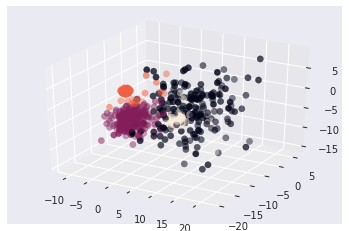

In [110]:
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], zdir='z', c=labels, s=40)

In [56]:
rng = np.random.RandomState(13)

In [60]:
X_stretched = np.dot(X,rng.randn(2,2))

/home/supercloud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/supercloud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/supercloud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/supercloud/anaconda3/lib/python3.6/site-packages/sklearn/u

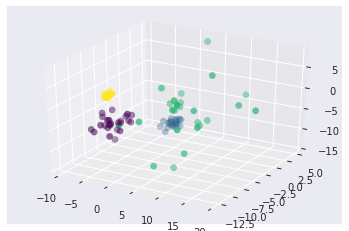

In [125]:
from sklearn.mixture import GMM
gmm = GMM(n_components=4, covariance_type="full").fit(X)
labels = gmm.predict(X)
fig = plt.figure()
axgmm = fig.add_subplot(111, projection='3d')
axgmm.scatter(X[:,0], X[:,1], X[:,2], zdir='z', c=labels, s=40, cmap='viridis')

/home/supercloud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function sample_gaussian is deprecated; The function sample_gaussian is deprecated in 0.18 and will be removed in 0.20. Use numpy.random.multivariate_normal instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/supercloud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function sample_gaussian is deprecated; The function sample_gaussian is deprecated in 0.18 and will be removed in 0.20. Use numpy.random.multivariate_normal instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/supercloud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function sample_gaussian is deprecated; The function sample_gaussian is deprecated in 0.18 and will be removed in 0.20. Use numpy.random.multivariate_normal instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/supercloud/anaconda3/l

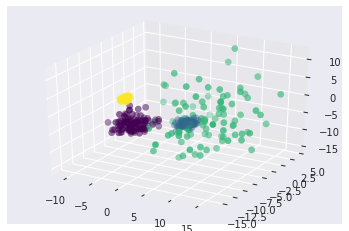

In [128]:
Xnew = gmm.sample(400, random_state=1329)
labels = gmm.predict(Xnew)
fig = plt.figure()
newax = fig.add_subplot(111, projection='3d')
newax.scatter(Xnew[:,0], Xnew[:,1], Xnew[:,2], zdir='z', c=labels, s=40, cmap='viridis')

array([[ -8.22842378,  -5.15606711,  -1.76925709],
       [  0.10138366,  -0.09001881,  -8.8543681 ],
       [ -0.56112116,  -1.52836954, -10.31721742],
       ..., 
       [  8.72898859,  -3.90756958,  -1.85845606],
       [ -6.74295856,  -6.87860948,  -8.27358552],
       [  0.46941982,   0.28033202,  -9.60880661]])

In [106]:
probs = gmm.predict_proba(X)
print(probs[:100].round(5))

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000

/home/supercloud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


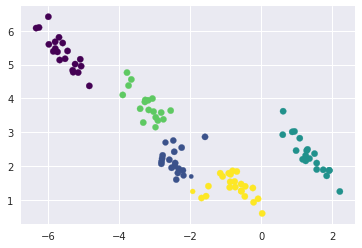

In [70]:
size = 40*probs.max(1) ** 3
plt.scatter(X_stretched[:,0],X_stretched[:,1],c=labels, cmap='viridis',s=size)

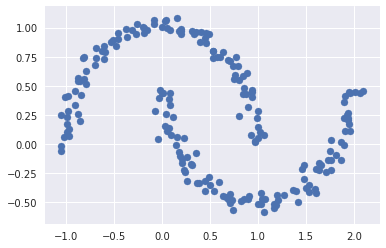

In [122]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise = 0.06, random_state=9)
plt.scatter(Xmoon[:,0], Xmoon[:, 1])

In [123]:
gmm2 = GMM(n_components=2, covariance_type='full', random_state=10)
plot_gmm(gmm2,Xmoon)

/home/supercloud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)


NameError: name 'plot_gmm' is not defined